### Project Name : In-Vehicle Coupon Classification
#### Project Type - Classification Problem
#### Contribution - Indiviual
#### Team member 1 - Aniket Mishra

### Project Summary:  In-Vehicle Coupon Dataset

#### Introduction
Vehicle coupon recommendation using machine learning classification helps predict whether a customer
will use a coupon based on their travel habits, personal preferences, and other factors. By analyzing
past data, machine learning models classify users into different groups—those likely to accept a
coupon and those who may not. This approach helps businesses target the right customers with 
personalized offers, improving customer engagement and increasing sales. In this presentation,
we will explore how classification techniques like Decision Trees, Logistic Regression, and 
Random Forest can be used to make accurate predictions and optimize coupon distribution.

#### Objectives
The main objectives of this project are as follows:

- Understand the Vehicle Coupon dataset and its features.
  
- Perform data wrangling to clean and preprocess the dataset for better analysis.

- Conduct exploratory data analysis (EDA) to gain insights into customer behavior and coupon usage patterns.

- Visualize the data to identify trends, correlations, and key influencing factors.
Select and evaluate machine learning models to classify whether a customer will redeem a coupon.

- Conclude with findings and recommendations for improving coupon targeting strategies.

#### Understanding the Data
The Vehicle Coupon Recommendation dataset includes features like age, gender, occupation, travel mode, destination, time, weather, and coupon type, which influence coupon redemption. The target variable indicates whether a customer accepts a coupon (Yes/No). This classification problem helps in building a machine learning model for personalized recommendations.

#### Data Wrangling
In this phase, we clean and preprocess the dataset to prepare it for analysis and modeling. This includes handling missing values, encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets

#### Data Visualization & Conclusion
We assess model performance using AUC-ROC curves, which measure how well the classification models predict coupon redemption. A higher AUC score indicates better accuracy in distinguishing between customers likely to use a coupon. Our findings show that customer demographics and travel behavior significantly influence coupon acceptance, helping businesses optimize their marketing strategies.

#### Finding the Best Machine Learning Model
To predict coupon redemption, we apply classification algorithms such as Logistic Regression, Decision Tree, and Random Forest. These models are trained and evaluated using metrics like accuracy, precision, recall, F1-score, and AUC-ROC to measure their effectiveness. Finally, we identify the best-performing model that provides the most accurate predictions, helping optimize coupon distribution for better customer engagement.










### Github link:
- `https://github.com/anikemishra791/vehicle-coupon-recommendation/blob/main/RAW%20PROJECT%20FILE.ipynb

### Columns Details
destination: No Urgent Place, Home, Work 

passanger: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)

weather: Sunny, Rainy, Snowy

temperature:55, 80, 30

time: 2PM, 10AM, 6PM, 7AM, 10PM

coupon: Restaurant(<20), Coffee House, Carry out & Take away, Bar, Restaurant($20-$50)

expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)

gender: Female, Male

age: 21, 46, 26, 31, 41, 50plus, 36, below21

maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed

has_Children:1, 0

education: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School

occupation: Unemployed, Architecture & Engineering, Student,

Education&Training&Library, Healthcare Support, 

Healthcare Practitioners & Technical, Sales & Related, Management,

Arts Design Entertainment Sports & Media, Computer & Mathematical,

Life Physical Social Science, Personal Care & Service,
 
Community & Social Services, Office & Administrative Support, 

Construction & Extraction, Legal, Retired, 

Installation Maintenance & Repair, Transportation & Material Moving, 

Business & Financial, Protective Service,

Food Preparation & Serving Related, Production Occupations, 

Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry

income: $37500 - $49999, $62500 - $74999, $12500 - $24999, $75000 - $87499, 

$50000 - $62499, $25000 - $37499, $100000 or More, $87500 - $99999, Less than $12500

Bar: never, less1, 1-3, gt8,  nan4-8 (feature meaning: how many times do you go to a bar every month?)

CoffeeHouse: never, less1, 4-8, 1-3, gt8,  nan (feature meaning: how many times do you go to a coffeehouse every month?)

CarryAway:n4~8, 1-3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)

RestaurantLessThan20: 4-8, 1-3, less1, gt8,  never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than $20 every month?)

Restaurant20To50: 1-3, less1, never, gt8, 4-8,  nan (feature meaning: how many times do you go to a restaurant with average expense per person of $20 - $50 every month?)

toCoupon_GEQ15min:0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)

toCoupon_GEQ25min:0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)

direction_same:0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)

direction_opp:1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)

Y:1, 0 (whether the coupon is accepted)


### 1.Know Your Data

### Importing Required Libraries

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [210]:
# reading data
df = pd.read_excel('vehicle^Mcoupon^Mrecommendation.xlsx')

In [211]:
# looking first five rows
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [212]:
# looking first last rows
df.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [213]:
# checking duplicate rows
df.duplicated().sum()

np.int64(74)

- We have 74 duplicates value in our dataset and we need to dro it.

In [214]:
# dropping duplicates rows
df.drop_duplicates(inplace=True)

In [215]:
df.shape

(12610, 26)

 - 12,610 rows (data entries)
- 23 columns (features)

In [216]:
# cheking more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null  obj

In [217]:
# cheking null values
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [218]:
# Unique values for each cols
def unique_value(col):
    print(f'Unique value for {col} column : {df[col].unique()}')

for col in df.columns:
    unique_value(col)
    print("-"*100)

Unique value for destination column : ['No Urgent Place' 'Home' 'Work']
----------------------------------------------------------------------------------------------------
Unique value for passanger column : ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
----------------------------------------------------------------------------------------------------
Unique value for weather column : ['Sunny' 'Rainy' 'Snowy']
----------------------------------------------------------------------------------------------------
Unique value for temperature column : [55 80 30]
----------------------------------------------------------------------------------------------------
Unique value for time column : ['2PM' '10AM' '6PM' '7AM' '10PM']
----------------------------------------------------------------------------------------------------
Unique value for coupon column : ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
-----------------------------------------------------

In [219]:
# Value counts for each cols
def value_counts(col):
    print(f'Value count for {col} column:- \n{df[col].value_counts()}')

for col in df.columns:
    value_counts(col)
    print('-'*100)

Value count for destination column:- 
destination
No Urgent Place    6266
Home               3230
Work               3114
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Value count for passanger column:- 
passanger
Alone        7248
Friend(s)    3292
Partner      1069
Kid(s)       1001
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Value count for weather column:- 
weather
Sunny    10011
Snowy     1397
Rainy     1202
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Value count for temperature column:- 
temperature
80    6475
55    3830
30    2305
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Value count for time column:- 
time
6PM     3220
7AM     3114
10AM    2271
2PM    

### 2.Data Wrangling and Data Manipulation 

In [220]:
'''
As we observe insignficant value '$' in income , so we need to replace it 
and there we have range in income we will split into  max salary and min salary
'''

"\nAs we observe insignficant value '$' in income , so we need to replace it \nand there we have range in income we will split into  max salary and min salary\n"

In [221]:
# Function to split a string by '-'
def split_data(data):  
    return data.split('-')  

# Apply function to 'income' column and store the result as a list
income = list(df['income'].apply(split_data))  

In [222]:
# Append the first value from each split income entry to min_income  
min_income = []
max_income = []
for i in income:
    min_income.append(i[0])  

In [223]:
min_income

['$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$7

In [224]:
# Append the last value from each split income entry to max_income  
for i in income:  
    max_income.append(i[-1])

In [225]:
max_income

[' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $

In [226]:
# Creating new columns 'min_income' and 'max_income' in the DataFrame  
# 'min_income' stores the first value from the split income range  
# 'max_income' stores the last value from the split income range  
df['min_income'] = min_income  
df['max_income'] = max_income  

In [227]:
# drop income
df.drop(columns = 'income',inplace=True)

In [228]:
# Handling  min_income  Column
df['min_income'].unique()
'''
In this columns we multiple value like['$37500 ', '$62500 ', '$12500 ', '$75000 ', '$50000 ', '$25000 ',
'$100000 or More', '$87500 ', 'Less than $12500'], dtype=object) and we need to make it clear
for understanding.

'''

"\nIn this columns we multiple value like['$37500 ', '$62500 ', '$12500 ', '$75000 ', '$50000 ', '$25000 ',\n'$100000 or More', '$87500 ', 'Less than $12500'], dtype=object) and we need to make it clear\nfor understanding.\n\n"

In [229]:
# Ensure all values are strings before applying string operations
df["min_income"] = df["min_income"].astype(str)

# Clean the column by removing unwanted characters
df["min_income"] = (
    df["min_income"]
    .str.replace("$", "", regex=False)  # Remove the dollar sign
    .str.replace(" or More", "", regex=False)  # Remove " or More"
    .str.replace("Less than ", "", regex=False)  # Remove "Less than "
)

# Convert to numeric, forcing errors to NaN
df["min_income"] = pd.to_numeric(df["min_income"], errors="coerce")


In [230]:
# Handling  min_income  Column
df['max_income'].unique()
'''
In this columns we multiple value like['$49999', '$62500 ', '$12500 ', '$75000 ', '$50000 ', '$25000 ',
'$100000 or More', '$87500 ', 'Less than $12500'], dtype=object) and we need to make it clear
for understanding.

'''

"\nIn this columns we multiple value like['$49999', '$62500 ', '$12500 ', '$75000 ', '$50000 ', '$25000 ',\n'$100000 or More', '$87500 ', 'Less than $12500'], dtype=object) and we need to make it clear\nfor understanding.\n\n"

In [231]:
# Ensure all values are strings before applying string operations
df["max_income"] = df["max_income"].astype(str)

# Clean the column by removing unwanted characters
df["max_income"] = (
    df["max_income"]
    .str.replace("$", "", regex=False)  # Remove the dollar sign
    .str.replace(" or More", "", regex=False)  # Remove " or More"
    .str.replace("Less than ", "", regex=False)  # Remove "Less than "
)

# Convert to numeric, forcing errors to NaN
df["max_income"] = pd.to_numeric(df["max_income"], errors="coerce")

In [232]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,min_income,max_income
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,1,37500,49999
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,0,37500,49999
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,1,37500,49999
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,37500,49999
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,37500,49999


In [233]:
# Handling  age  Column
df['age'].unique()
'''
in this column we have two insignficant value '50plus',  'below21' 
Replace '50plus' with 50 and 'below21' with 21
'''

"\nin this column we have two insignficant value '50plus',  'below21' \nReplace '50plus' with 50 and 'below21' with 21\n"

In [234]:
# Replace '50plus' with 50 and 'below21' with 21
df["age"] = df["age"].replace({"50plus": 50, "below21": 21})

# Convert the column to numeric
df["age"] = pd.to_numeric(df["age"], errors="coerce")

In [235]:
# feature enhineering on expiration column

def clean_expiration(data):
    data = data.replace('1d', '24').replace('2h', '2')
    return float(data)
    # return None  # Handle cases where input does df not match expected format

In [236]:
expiration_in_hrs = df['expiration'].apply(clean_expiration)

In [237]:
# Apply the clean_expiration function to the 'expiration' column to transform values into hours
expiration_in_hrs = df['expiration'].apply(clean_expiration)
df['expiration'] = expiration_in_hrs  # changing column name

In [238]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,min_income,max_income
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),24.0,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,1,37500,49999
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2.0,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,0,37500,49999
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2.0,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,1,37500,49999
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2.0,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,37500,49999
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,24.0,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,37500,49999


In [239]:
# Handling   RestaurantLessThan20	Column
df['RestaurantLessThan20'].unique()

'''
In this column we have multiple value like 'never', 'less1', '1~3', 'gt8', nan, '4~8'.. 
and we need to make it clear for understanding.

step1 : impute values

step2 : impute relevant value instead of insignificant values

step3 : Convert column from object to int for futher analysis

step4 : checking distribution of particular column for imputing values accordingly


'''



"\nIn this column we have multiple value like 'never', 'less1', '1~3', 'gt8', nan, '4~8'.. \nand we need to make it clear for understanding.\n\nstep1 : impute values\n\nstep2 : impute relevant value instead of insignificant values\n\nstep3 : Convert column from object to int for futher analysis\n\nstep4 : checking distribution of particular column for imputing values accordingly\n\n\n"

In [240]:
#  Step 1 :impute values 
mode_value = df['RestaurantLessThan20'].mode()[0]

df['RestaurantLessThan20'].fillna(mode_value,inplace=True)

In [241]:
# Step 2: Replace categorical values with numerical equivalents
mapping = {'never': 0, 'less1': 1, '1~3': 2, '4~8': 6, 'gt8': 9}
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].map(mapping)

In [242]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12610 non-null  object 
 1   passanger             12610 non-null  object 
 2   weather               12610 non-null  object 
 3   temperature           12610 non-null  int64  
 4   time                  12610 non-null  object 
 5   coupon                12610 non-null  object 
 6   expiration            12610 non-null  float64
 7   gender                12610 non-null  object 
 8   age                   12610 non-null  int64  
 9   maritalStatus         12610 non-null  object 
 10  has_children          12610 non-null  int64  
 11  education             12610 non-null  object 
 12  occupation            12610 non-null  object 
 13  car                   108 non-null    object 
 14  Bar                   12503 non-null  object 
 15  CoffeeHouse           12

In [243]:
# step3 : Convert column from object to int for futher analysis
#Note : As we see above out data already in a float. So, no need to change the datatype

<Axes: xlabel='RestaurantLessThan20', ylabel='Count'>

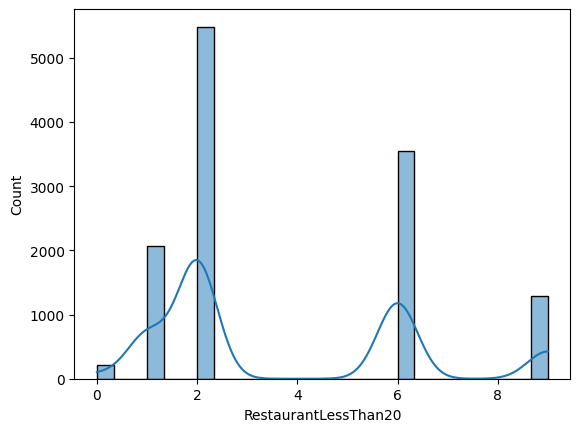

In [244]:
# step 4 : checking distribution of particular column for imputing values accordingly
sns.histplot(df['RestaurantLessThan20'],kde=True)

In [245]:
# Handling   Restaurant20To50	Column
df['Restaurant20To50'].unique()

'''
In this column we have multiple value like 'never', 'less1', '1~3', 'gt8', nan, '4~8'.. 
and we need to make it clear for understanding.

step1 : impute values

step2 : impute relevant value instead of insignificant values

step3 : Convert column from object to int for futher analysis

step4 : checking distribution of particular column for imputing values accordingly


'''



"\nIn this column we have multiple value like 'never', 'less1', '1~3', 'gt8', nan, '4~8'.. \nand we need to make it clear for understanding.\n\nstep1 : impute values\n\nstep2 : impute relevant value instead of insignificant values\n\nstep3 : Convert column from object to int for futher analysis\n\nstep4 : checking distribution of particular column for imputing values accordingly\n\n\n"

In [246]:
#  Step 1 :impute values 
mode_value = df['Restaurant20To50'].mode()[0]

df['Restaurant20To50'].fillna(mode_value,inplace=True)

In [247]:
#  Step 1 :impute values 
mode_value = df['Restaurant20To50'].mode()[0]

df['Restaurant20To50'].fillna(mode_value,inplace=True)

In [248]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12610 non-null  object 
 1   passanger             12610 non-null  object 
 2   weather               12610 non-null  object 
 3   temperature           12610 non-null  int64  
 4   time                  12610 non-null  object 
 5   coupon                12610 non-null  object 
 6   expiration            12610 non-null  float64
 7   gender                12610 non-null  object 
 8   age                   12610 non-null  int64  
 9   maritalStatus         12610 non-null  object 
 10  has_children          12610 non-null  int64  
 11  education             12610 non-null  object 
 12  occupation            12610 non-null  object 
 13  car                   108 non-null    object 
 14  Bar                   12503 non-null  object 
 15  CoffeeHouse           12

In [249]:
## step3 : Convert column from object to int for futher analysis
## Note : As we see above out data already in a float. So, no need to change the datatype

In [250]:
# Remove unnecessary columns ('car', 'Bar', 'CoffeeHouse', 'CarryAway') as they are not required for analysis
df.drop(columns=['car', 'Bar', 'CoffeeHouse', 'CarryAway'], inplace=True)

In [251]:
# Checking Imbalanced 
df['Y'].value_counts()

Y
1    7157
0    5453
Name: count, dtype: int64

In [253]:
##In your dataset, the Y column represents whether a coupon is accepted:

# Y = 1 → Coupon was accepted (7210 times).
# Y = 0 → Coupon was not accepted (5474 times).
# This means your task likely involves predicting whether a customer will accept a coupon based on other features. 

###  Encoding Data

In [254]:
# data encoding
''''
df -> 1. numeric
   -> 2. Categorical-> data Encoding(label Encoding)
   cocat : df = numeric + Categorical -> data encoding(label encoding)
'''
cat_df = df.select_dtypes(include ='object')
num_df = df.select_dtypes(exclude ='object')

In [255]:
cat_df.head(2)

,destination,passanger,weather,time,coupon,gender,maritalStatus,education,occupation,Restaurant20To50
0,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),Female,Unmarried partner,Some college - no degree,Unemployed,1~3
1,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,Female,Unmarried partner,Some college - no degree,Unemployed,1~3


In [256]:
num_df.head(2)

,temperature,expiration,age,has_children,RestaurantLessThan20,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,min_income,max_income
0,55,24.0,21,1,6,1,0,0,0,1,1,37500,49999
1,80,2.0,21,1,6,1,0,0,0,1,0,37500,49999


In [257]:
# importing class
from sklearn.preprocessing import LabelEncoder

# creating instance
lr = LabelEncoder()

# list of columns name
columns = cat_df.columns

#fit transform
for col in columns:
    cat_df[col] = lr.fit_transform(cat_df[col])


In [258]:
cat_df.head(2)

,destination,passanger,weather,time,coupon,gender,maritalStatus,education,occupation,Restaurant20To50
0,1,0,2,2,4,0,3,5,24,0
1,1,1,2,0,2,0,3,5,24,0


In [259]:
# concat 
df= pd.concat([cat_df,num_df],axis = 1)

In [260]:
df.head()

,destination,passanger,weather,time,coupon,gender,maritalStatus,education,occupation,Restaurant20To50,...,has_children,RestaurantLessThan20,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,min_income,max_income
0,1,0,2,2,4,0,3,5,24,0,...,1,6,1,0,0,0,1,1,37500,49999
1,1,1,2,0,2,0,3,5,24,0,...,1,6,1,0,0,0,1,0,37500,49999
2,1,1,2,0,1,0,3,5,24,0,...,1,6,1,1,0,0,1,1,37500,49999
3,1,1,2,2,2,0,3,5,24,0,...,1,6,1,1,0,0,1,0,37500,49999
4,1,1,2,2,2,0,3,5,24,0,...,1,6,1,1,0,0,1,0,37500,49999


### spliting the data into x and y

In [261]:
x =df.drop(columns= 'Y')
y= df['Y']

### splitting data into train and test

In [262]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

### Model1 : LogisticRegression

In [263]:
# Import necessary libraries for evaluation metrics and ensemble modeling
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

# Create an instance of BaggingClassifier using Logistic Regression as the base estimator (base model)
# 'class_weight=balanced' assigns more weight to the minority class to handle class imbalance in the dataset
bg = BaggingClassifier(LogisticRegression(class_weight='balanced'))

# Fit the BaggingClassifier on the training dataset (xtrain and ytrain)
bg.fit(xtrain, ytrain)

# Predict the target variable (Y) for the test dataset (xtest)
ypred = bg.predict(xtest)

# Evaluate model performance on the training and testing datasets using accuracy
print(f'Training Score: {bg.score(xtrain, ytrain)}')  # Accuracy on training data
print(f'Testing Score: {bg.score(xtest, ytest)}')    # Accuracy on testing data

# Display the classification report (precision, recall, f1-score, support) to evaluate the prediction quality
print('Classification Report')
print(classification_report(ytest, ypred))

# Display the confusion matrix to understand the true positive, true negative, false positive, and false negative values
print(confusion_matrix(ytest, ypred))

Training Score: 0.5779143536875495
Testing Score: 0.5808881839809675
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.57      0.53      1052
           1       0.66      0.59      0.62      1470

    accuracy                           0.58      2522
   macro avg       0.58      0.58      0.58      2522
weighted avg       0.59      0.58      0.58      2522

[[595 457]
 [600 870]]


### Model 2 :  DecisionTreeClassifier

In [264]:
# Import DecisionTreeClassifier from sklearn for use as the base model
from sklearn.tree import DecisionTreeClassifier

# Create an instance of BaggingClassifier using DecisionTreeClassifier as the base estimator (base model)
bg = BaggingClassifier(DecisionTreeClassifier())

# Fit the BaggingClassifier on the training dataset (xtrain and ytrain)
bg.fit(xtrain, ytrain)

# Predict the target variable (Y) for the test dataset (xtest)
ypred = bg.predict(xtest)

# Evaluate model performance using accuracy on training and testing datasets
print(f'Training Score: {bg.score(xtrain, ytrain)}')  # Accuracy on training data
print(f'Testing Score: {bg.score(xtest, ytest)}')    # Accuracy on testing data

# Display the classification report (Precision, Recall, F1-score, and Support for each class)
print('Classification Report')
print(classification_report(ytest, ypred))

# Display the confusion matrix to analyze the correct and incorrect predictions
print(confusion_matrix(ytest, ypred))

Training Score: 0.9815622521808088
Testing Score: 0.69746233148295
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.70      0.66      1052
           1       0.77      0.69      0.73      1470

    accuracy                           0.70      2522
   macro avg       0.69      0.70      0.69      2522
weighted avg       0.71      0.70      0.70      2522

[[ 739  313]
 [ 450 1020]]


### Model 3: ROC-AUC

In [265]:
# Predict the probability of each class for the test dataset
# Extract the probability of the positive class (class 1 - Coupon Accepted)
bg.predict_proba(xtest)[:, 1]

array([0.1, 0.8, 0.9, ..., 0.3, 0.6, 0.7])

In [266]:
# Import ROC curve and AUC metric from sklearn
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class (class 1 - Coupon Accepted)
# predict_proba() returns probabilities for both classes; [:, 1] selects the positive class (1) probabilities
y_probs = bg.predict_proba(xtest)[:, 1]

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for ROC Curve
fpr, tpr, _ = roc_curve(ytest, y_probs)

# Calculate Area Under the ROC Curve (AUC) - represents the model's ability to distinguish between classes
roc_auc = auc(fpr, tpr)

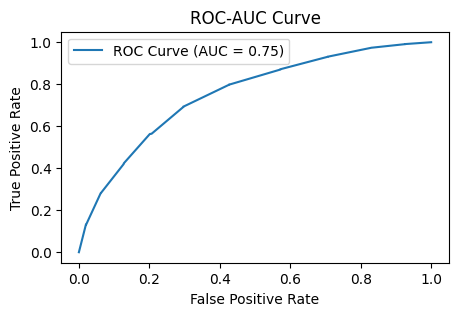

In [267]:
# Plot the ROC Curve along with the AUC value
plt.figure(figsize=[5, 3])  # Set the plot size

# Plot the ROC curve using FPR (X-axis) and TPR (Y-axis)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')

# Set the plot title
plt.title('ROC-AUC Curve')

# Label the X-axis as False Positive Rate
plt.xlabel('False Positive Rate')

# Label the Y-axis as True Positive Rate
plt.ylabel('True Positive Rate')

# Display the legend showing the AUC value
plt.legend()

# Display the plot
plt.show()

# Model4 : Randomforest

In [268]:
# Import RandomForestClassifier from the sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier

# Create an instance of RandomForestClassifier with default parameters
bg = RandomForestClassifier()

# Fit the RandomForestClassifier model on the training data (xtrain, ytrain)
bg.fit(xtrain, ytrain)

# Predict the target values for the test data (xtest)
ypred = bg.predict(xtest)

# Evaluate the model's accuracy on both training and testing datasets
print(f'Training Score: {bg.score(xtrain, ytrain)}')  # Accuracy on training data
print(f'Testing Score: {bg.score(xtest, ytest)}')    # Accuracy on testing data

# Display the classification report (Precision, Recall, F1-score, and Support)
print('Classification Report')
print(classification_report(ytest, ypred))

# Display the confusion matrix to analyze the correct and incorrect predictions
print(confusion_matrix(ytest, ypred))

Training Score: 0.9974226804123711
Testing Score: 0.7133227597145123
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.62      0.64      1052
           1       0.74      0.78      0.76      1470

    accuracy                           0.71      2522
   macro avg       0.71      0.70      0.70      2522
weighted avg       0.71      0.71      0.71      2522

[[ 649  403]
 [ 320 1150]]


In [269]:
# Get predicted probabilities for the positive class (class 1 - Coupon Accepted)
# predict_proba() returns probabilities for both classes; [:, 1] selects the positive class (1) probabilities
y_probs = bg.predict_proba(xtest)[:, 1]

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for ROC curve
fpr, tpr, _ = roc_curve(ytest, y_probs)

# Calculate the Area Under the ROC Curve (AUC) to measure the model's performance
roc_auc = auc(fpr, tpr)

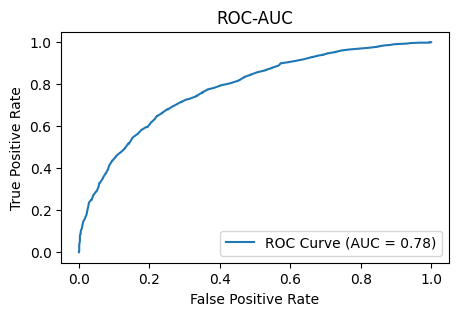

In [270]:
# Plot the ROC Curve along with the AUC value

plt.figure(figsize=[5, 3])  # Set the size of the plot (5 inches wide, 3 inches tall)

# Plot the ROC curve using False Positive Rate (fpr) on X-axis and True Positive Rate (tpr) on Y-axis
# Display AUC value inside the plot using formatted string
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')

# Set the title of the plot
plt.title('ROC-AUC')

# Label for X-axis representing False Positive Rate (FPR)
plt.xlabel('False Positive Rate')

# Label for Y-axis representing True Positive Rate (TPR)
plt.ylabel('True Positive Rate')

# Display the legend showing the label with the AUC value
plt.legend()

# Display the plot
plt.show()

# Voting Classifier

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [272]:
# estimators : list of (str, estimator) tuples
model = []
model.append(('LogisticRegression',LogisticRegression()))
model.append(('KNeighborsClassifier',KNeighborsClassifier()))
model.append(('DecisionTreeClassifier',DecisionTreeClassifier()))

In [273]:
model

[('LogisticRegression', LogisticRegression()),
 ('KNeighborsClassifier', KNeighborsClassifier()),
 ('DecisionTreeClassifier', DecisionTreeClassifier())]

In [274]:
# Import VotingClassifier from ensemble module of sklearn library
from sklearn.ensemble import VotingClassifier

# Create an instance of VotingClassifier with the list of models (base estimators) to combine
# 'model' is assumed to be a list of tuples containing model names and instances e.g., [('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())]
vc = VotingClassifier(estimators=model)

# Fit the Voting Classifier model on the training data (xtrain, ytrain)
vc.fit(xtrain, ytrain)

# Predict the target values for the test data (xtest)
ypred = vc.predict(xtest)

# Evaluate and print the model's accuracy on both training and testing datasets
print(f'Training Score: {vc.score(xtrain, ytrain)}')  # Accuracy on training data
print(f'Testing Score: {vc.score(xtest, ytest)}')    # Accuracy on testing data

# Print the classification report (Precision, Recall, F1-score, and Support)
print('Classification Report')
print(classification_report(ytest, ypred))

# Print the confusion matrix to analyze the correct and incorrect predictions
print(confusion_matrix(ytest, ypred))

Training Score: 0.8510111022997621
Testing Score: 0.6586042823156225
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.48      0.54      1052
           1       0.68      0.78      0.73      1470

    accuracy                           0.66      2522
   macro avg       0.65      0.63      0.63      2522
weighted avg       0.65      0.66      0.65      2522

[[ 509  543]
 [ 318 1152]]


### Boosting 

In [275]:
# Import AdaBoostClassifier from sklearn.ensemble module
from sklearn.ensemble import AdaBoostClassifier

# Create an instance of AdaBoostClassifier with default base estimator (DecisionTreeClassifier with max_depth=1)
ada = AdaBoostClassifier()

# Fit the AdaBoost model on the training data (xtrain, ytrain)
ada.fit(xtrain, ytrain)

# Predict the target values for the test data (xtest)
ypred = ada.predict(xtest)

# Accuracy - Evaluate and print the model's accuracy on both training and testing datasets
print(f'Training Score: {ada.score(xtrain, ytrain)}')  # Accuracy on training data
print(f'Testing Score: {ada.score(xtest, ytest)}')    # Accuracy on testing data

# Print the classification report showing Precision, Recall, F1-score, and Support
print('Classification Report')
print(classification_report(ytest, ypred))

# Print the confusion matrix to analyze the number of correct and incorrect predictions
print(confusion_matrix(ytest, ypred))

Training Score: 0.6627676447264076
Testing Score: 0.6816019032513878
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.54      0.58      1052
           1       0.70      0.79      0.74      1470

    accuracy                           0.68      2522
   macro avg       0.67      0.66      0.66      2522
weighted avg       0.68      0.68      0.68      2522

[[ 564  488]
 [ 315 1155]]


In [276]:
# Predict the probabilities for the positive class (class 1) from the AdaBoost model
# The predict_proba() method returns probabilities for both classes; [:, 1] selects the probability of class 1
y_probs = ada.predict_proba(xtest)[:, 1]

# Compute the ROC curve values: 
# fpr - False Positive Rate, tpr - True Positive Rate, _ - thresholds (not used here)
fpr, tpr, _ = roc_curve(ytest, y_probs)

# Compute the AUC (Area Under the Curve) using False Positive Rate (fpr) and True Positive Rate (tpr)
roc_auc = auc(fpr, tpr)

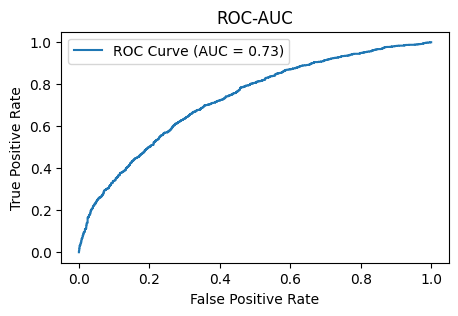

In [277]:
# Plot ROC-AUC curve for visualizing model performance
plt.figure(figsize=[5, 3])  # Set the plot size to 5 by 3 inches

# Plot the ROC curve using False Positive Rate (fpr) and True Positive Rate (tpr)
# Label the curve with AUC value rounded to 2 decimal places
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')

# Add title to the plot
plt.title('ROC-AUC')

# Label x-axis as False Positive Rate
plt.xlabel('False Positive Rate')

# Label y-axis as True Positive Rate
plt.ylabel('True Positive Rate')

# Display the legend showing the AUC value
plt.legend()

# Display the plot
plt.show()

### Gradient Boosting

In [278]:
# Import GradientBoostingClassifier from sklearn.ensemble module
from sklearn.ensemble import GradientBoostingClassifier

# Create an instance of GradientBoostingClassifier with default parameters
ada_gbc = GradientBoostingClassifier()

# Fit (train) the Gradient Boosting model on the training data (xtrain, ytrain)
ada_gbc.fit(xtrain, ytrain)

# Predict the target variable for the test data (xtest)
ypred = ada_gbc.predict(xtest)

# Evaluate the accuracy on the training and testing datasets
print(f'Training Score: {ada_gbc.score(xtrain, ytrain)}')  # Training accuracy
print(f'Testing Score: {ada_gbc.score(xtest, ytest)}')  # Testing accuracy

# Generate a classification report showing precision, recall, F1-score, and support for each class
print('Classification Report')
print(classification_report(ytest, ypred))

# Display the confusion matrix to understand the distribution of predictions
print(confusion_matrix(ytest, ypred))

Training Score: 0.7029143536875495
Testing Score: 0.6962727993655828
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.56      0.61      1052
           1       0.72      0.79      0.75      1470

    accuracy                           0.70      2522
   macro avg       0.69      0.68      0.68      2522
weighted avg       0.69      0.70      0.69      2522

[[ 592  460]
 [ 306 1164]]


In [279]:
#class
from sklearn.metrics import roc_curve, auc  # Import roc_curve and auc for evaluating model performance using ROC-AUC

# positive prediction from model
y_probs = ada_gbc.predict_proba(xtest)[:, 1]  # Predict probability for the positive class (class 1)

# compute roc and auc
fpr, tpr, _ = roc_curve(ytest, y_probs)  # Compute False Positive Rate (fpr), True Positive Rate (tpr), and thresholds

# auc
roc_auc = auc(fpr, tpr)  # Calculate Area Under the ROC Curve (AUC)

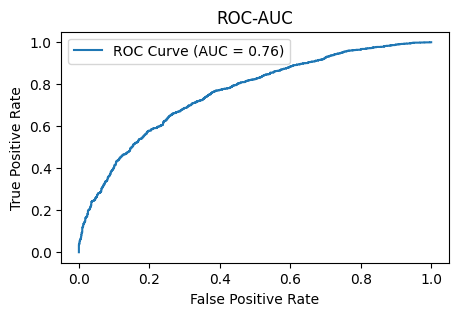

In [280]:
# plot roc and auc 
plt.figure(figsize=[5, 3])  # Set the figure size to 5x3 inches for better visualization
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')  # Plot the ROC curve using FPR and TPR values, display AUC in the legend
plt.title('ROC-AUC')  # Set plot title
plt.xlabel('False Positive Rate')  # Label for x-axis
plt.ylabel('True Positive Rate')  # Label for y-axis
plt.legend()  # Display legend with the AUC information
plt.show()  # Show the plot

 ### Xtream Gradient Boosting

In [281]:
# Import XGBoost classifier class
from xgboost import XGBClassifier

# Create an instance of XGBClassifier (default hyperparameters)
xgb = XGBClassifier()

# Fit the model on training data
xgb.fit(xtrain, ytrain)

# Make predictions on the test set
ypred = xgb.predict(xtest)

# Accuracy evaluation - Training and Testing scores
print(f'Training Score: {xgb.score(xtrain, ytrain)}')  # Evaluate accuracy on training data
print(f'Testing Score: {xgb.score(xtest, ytest)}')  # Evaluate accuracy on test data

print('Classification Report')  
print(classification_report(ytest, ypred))  # Displays precision, recall, F1-score, and support for each class

print(confusion_matrix(ytest, ypred))  # Displays the confusion matrix showing true positives, true negatives, false positives, and false negatives

Training Score: 0.9073156225218081
Testing Score: 0.7359238699444886
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      1052
           1       0.77      0.78      0.78      1470

    accuracy                           0.74      2522
   macro avg       0.73      0.73      0.73      2522
weighted avg       0.73      0.74      0.74      2522

[[ 704  348]
 [ 318 1152]]


In [282]:
# Predict probabilities for the positive class (class=1)
# predict_proba() returns probability estimates for each class, [0] for class 0 and [1] for class 1
y_probs = xgb.predict_proba(xtest)[:, 1]

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds using roc_curve
fpr, tpr, _ = roc_curve(ytest, y_probs)

# Calculate Area Under the Curve (AUC) using FPR and TPR values
roc_auc = auc(fpr, tpr)

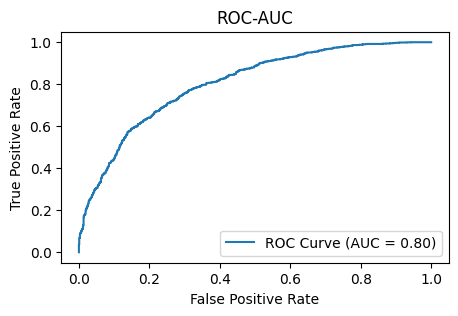

In [283]:
# Plot ROC Curve along with AUC value
plt.figure(figsize=[5,3])  # Set the plot size to 5x3 inches
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')  # Plot False Positive Rate vs True Positive Rate
plt.title('ROC-AUC')  # Set the plot title
plt.xlabel('False Positive Rate')  # Label for x-axis
plt.ylabel('True Positive Rate')  # Label for y-axis
plt.legend()  # Display the legend showing the AUC value
plt.show()  # Display the plot